In [10]:
from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter
import glob
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt


In [3]:
# import a set of images in a folder
image_files = glob.glob("/Users/valentingoupille/Desktop/Petri_analysis/image/test/1/*.JPG")  # change extension as needed
images = [imread(f) for f in image_files]
images

[array([[[ 61,  62,  82],
         [ 65,  66,  86],
         [ 69,  70,  90],
         ...,
         [ 77,  82, 101],
         [ 77,  82, 101],
         [ 70,  75,  94]],
 
        [[ 60,  61,  81],
         [ 62,  63,  83],
         [ 69,  70,  90],
         ...,
         [ 73,  78,  98],
         [ 76,  81, 100],
         [ 79,  84, 103]],
 
        [[ 58,  59,  79],
         [ 64,  65,  85],
         [ 70,  73,  92],
         ...,
         [ 75,  80, 100],
         [ 76,  81, 101],
         [ 82,  87, 107]],
 
        ...,
 
        [[ 69,  77,  90],
         [ 67,  75,  88],
         [ 66,  74,  87],
         ...,
         [ 78,  83, 102],
         [ 88,  95, 113],
         [ 89,  96, 114]],
 
        [[ 65,  75,  87],
         [ 62,  72,  84],
         [ 61,  71,  83],
         ...,
         [ 85,  88, 107],
         [ 89,  92, 109],
         [ 89,  92, 109]],
 
        [[ 67,  77,  87],
         [ 66,  76,  86],
         [ 62,  72,  82],
         ...,
         [ 91,  92, 112],
  

In [6]:
print(f"Number of images loaded: {len(images)}")

Number of images loaded: 7


In [5]:
shapes = [image.shape for image in images]
shapes

[(4000, 6000, 3),
 (4000, 6000, 3),
 (4000, 6000, 3),
 (4000, 6000, 3),
 (4000, 6000, 3),
 (4000, 6000, 3),
 (4000, 6000, 3)]

In [15]:
image0 = images[0]

print(f"Image shape: {image0.shape}, dtype = {image0.dtype}, min = {image0.min()}, max = {image0.max()}")

Image shape: (4000, 6000, 3), dtype = uint8, min = 0, max = 255


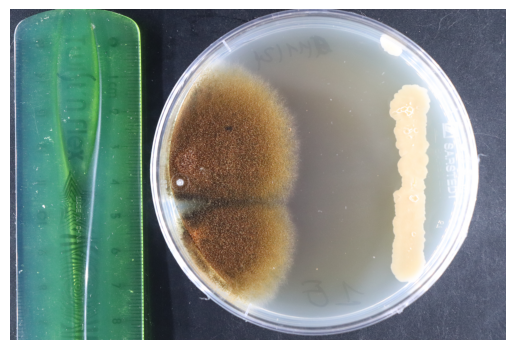

In [13]:
plt.imshow(image0)
plt.axis('off')
plt.show()

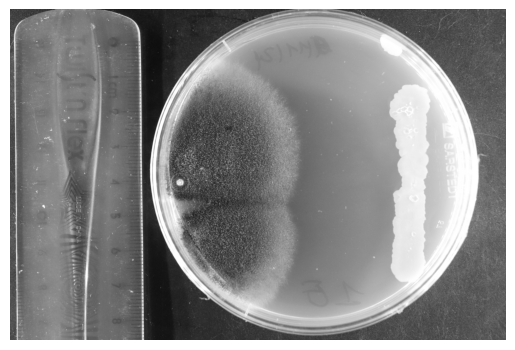

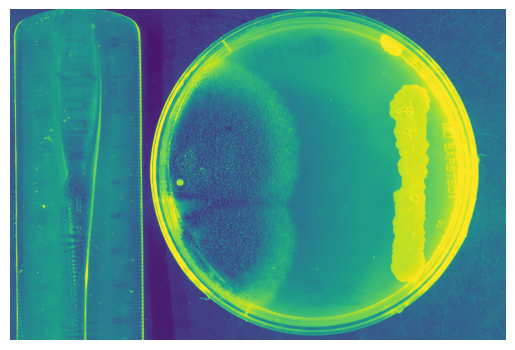

In [12]:
image_gray = color.rgb2gray(image0) # convert RGB to grayscale
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(image_gray)
plt.axis('off')
plt.show()

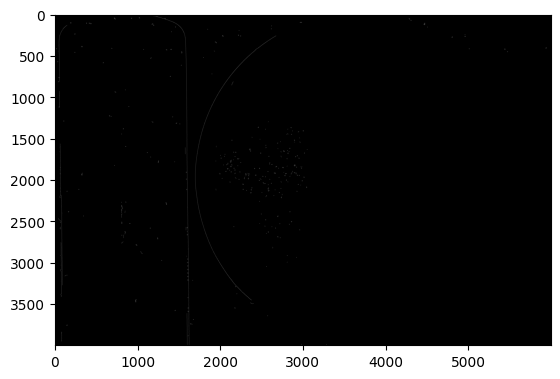

In [26]:
# edge detection with canny
edges = canny(image_gray, sigma=1, low_threshold=0.5, high_threshold=1)
plt.imshow(edges, cmap='gray')
plt.show()

In [53]:
edges1 = canny(image_gray, sigma=1, low_threshold=0.05, high_threshold=0.1)
edges2 = canny(image_gray, sigma=1, low_threshold=0.1, high_threshold=0.3)
edges3 = canny(image_gray, sigma=1, low_threshold=0.3, high_threshold=0.5)
edges4 = canny(image_gray, sigma=1, low_threshold=0.5, high_threshold=0.6)
edges5 = canny(image_gray, sigma=2, low_threshold=0.1, high_threshold=0.3)

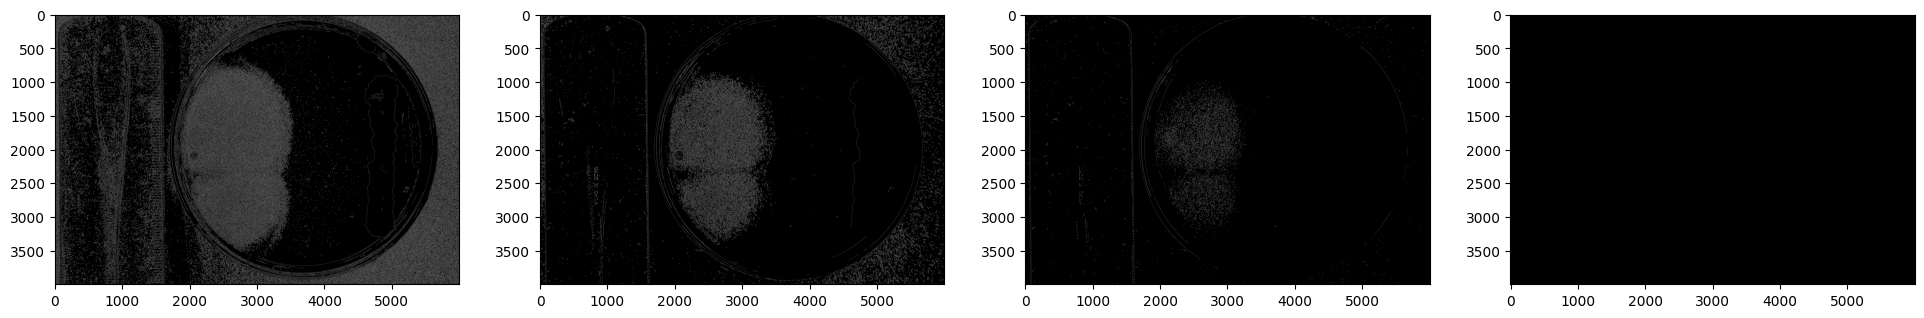

In [44]:
plt.figure(figsize=(24, 6))

plt.subplot(1, 4, 1)
plt.imshow(edges1, cmap='gray')


plt.subplot(1, 4, 2)
plt.imshow(edges2, cmap='gray')


plt.subplot(1, 4, 3)
plt.imshow(edges3, cmap='gray')


plt.subplot(1, 4, 4)
plt.imshow(edges4, cmap='gray')


plt.show()




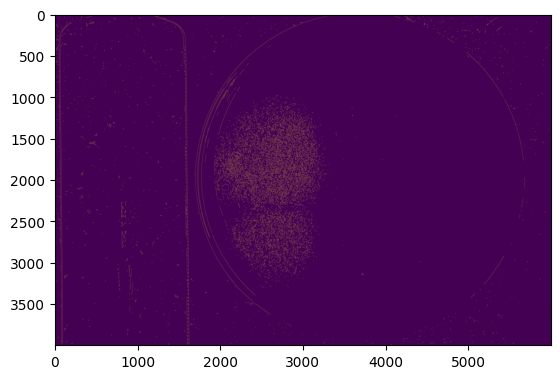

In [45]:
plt.imshow(edges3)

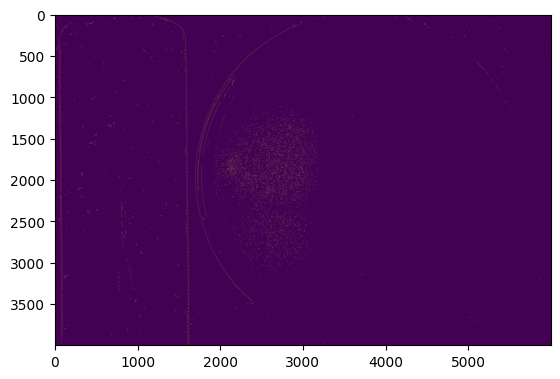

In [50]:
plt.imshow(edges4)

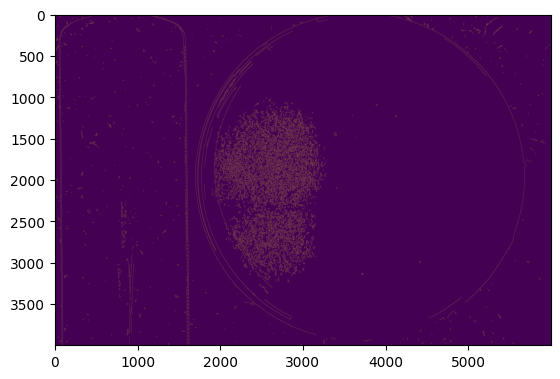

In [54]:
plt.imshow(edges5)

# je vais tester avec edge3 

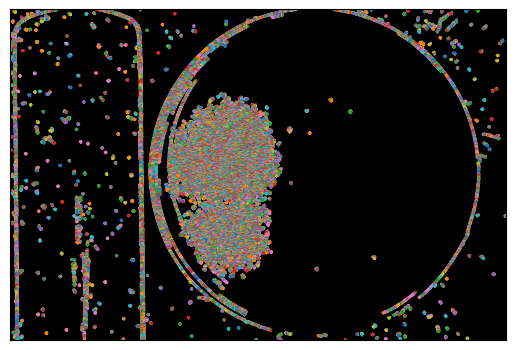

In [67]:
from skimage import measure
# Find contours at a constant value of 0.8
contours = measure.find_contours(edges5, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(edges5, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [55]:
from skimage.transform import hough_circle, hough_circle_peaks
# Detect two radii 
hough_radii = np.arange(1500, 3000, 500)
hough_res = hough_circle(edges3, hough_radii)

In [56]:
# Select the most prominent 1 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)

In [57]:
hough_res

array([[[1.41376060e-03, 1.53157399e-03, 1.88501414e-03, ...,
         1.06032045e-03, 3.53440151e-04, 5.89066918e-04],
        [1.76720075e-03, 1.64938737e-03, 1.64938737e-03, ...,
         1.06032045e-03, 3.53440151e-04, 5.89066918e-04],
        [1.76720075e-03, 1.64938737e-03, 1.88501414e-03, ...,
         1.29594722e-03, 5.89066918e-04, 7.06880302e-04],
        ...,
        [9.42507069e-04, 8.24693685e-04, 8.24693685e-04, ...,
         3.53440151e-04, 3.53440151e-04, 3.53440151e-04],
        [7.06880302e-04, 5.89066918e-04, 5.89066918e-04, ...,
         4.71253534e-04, 4.71253534e-04, 4.71253534e-04],
        [8.24693685e-04, 8.24693685e-04, 8.24693685e-04, ...,
         3.53440151e-04, 3.53440151e-04, 3.53440151e-04]],

       [[3.53356890e-04, 4.41696113e-04, 5.30035336e-04, ...,
         8.83392226e-05, 8.83392226e-05, 8.83392226e-05],
        [3.53356890e-04, 4.41696113e-04, 7.06713781e-04, ...,
         8.83392226e-05, 8.83392226e-05, 8.83392226e-05],
        [7.95053004e-04, 

In [58]:
print("Votes des cercles :", accums)
print("Centres X :", cx)
print("Centres Y :", cy)
print("Rayons :", radii)

Votes des cercles : [0.09001767]
Centres X : [3698]
Centres Y : [1969]
Rayons : [2000]


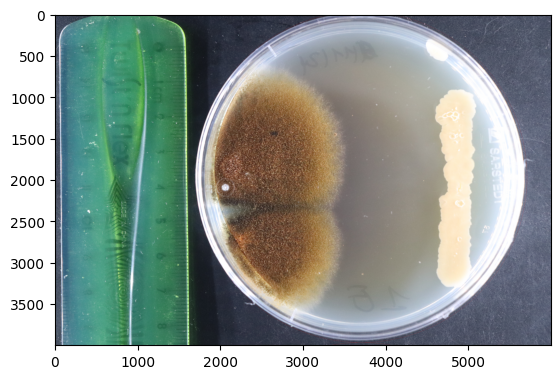

In [63]:
from skimage.draw import circle_perimeter

# Drew the detected circles
image_result = image0.copy()
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image_result[circy, circx] = (220, 20, 20)  # red color for the circle
plt.imshow(image_result)

In [ ]:
import cv2
import numpy as np

# Lecture
img = cv2.imread("/Users/valentingoupille/Desktop/Petri_analysis/image/test/1/Control4.JPG")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Seuillage + contour
_, thresh = cv2.threshold(blur, 50, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Plus grand contour
c = max(contours, key=cv2.contourArea)

# Cercle englobant
(x,y), radius = cv2.minEnclosingCircle(c)
center = (int(x), int(y))
radius = int(radius)

# Dessin
cv2.circle(img, center, radius, (0,0,255), 2)
cv2.imshow("result", img)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np

# Read image
img = cv2.imread("/Users/valentingoupille/Desktop/Petri_analysis/image/test/1/Control4.JPG")
output = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Reduce noise
gray = cv2.medianBlur(gray, 5)

# Detect circles
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=100,      
    param1=100,         
    param2=40,       
    minRadius=2000,       
    maxRadius=4000
)

# Draw only the first detected circle
if circles is not None:
    circles = np.uint16(np.around(circles))
    x, y, r = circles[0][0]
    cv2.circle(output, (x, y), r, (0, 255, 0), 2)  # Circle outline
    cv2.circle(output, (x, y), 2, (0, 0, 255), 3)  # Center point

# Show result
cv2.imshow('Detected Circle', output)
cv2.waitKey(0)
cv2.destroyAllWindows()